# Clothes_Detection_CNN

**The project is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**



    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.keras.datasets import fashion_mnist

In [2]:
#import dataset

(X_train,y_train) ,(X_test,y_test) = fashion_mnist.load_data()

### Visualizing the data

In [3]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


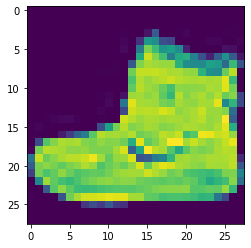

In [4]:
plt.imshow(X_train[0])

## Preprocessing the data

In [5]:
X_train.max()

255

In [6]:
X_train = X_train /255

In [7]:
X_test = X_test /255

We have to reshape the X arrays to include a 4 dimension of the single channel

In [8]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


Converting the y columns into categorical

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

### Bulding the model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout

In [12]:
model = Sequential()


# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))



# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

#128 neurons in dense hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))



# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Training the model

In [14]:
model.fit(X_train,y_cat_train, 
          validation_data=(X_test,y_cat_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.7628 - accuracy: 0.7205 - val_loss: 0.4149 - val_accuracy: 0.8484
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3750 - accuracy: 0.8614 - val_loss: 0.3440 - val_accuracy: 0.8771
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3155 - accuracy: 0.8841 - val_loss: 0.3184 - val_accuracy: 0.8863
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2824 - accuracy: 0.8970 - val_loss: 0.2992 - val_accuracy: 0.8911
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2637 - accuracy: 0.9037 - val_loss: 0.3544 - val_accuracy: 0.8667
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2456 - accuracy: 0.9077 - val_loss: 0.2898 - val_accuracy: 0.8915
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2289 - accuracy: 0.9161 - val_loss: 0.2859 -

In [15]:
metrics = pd.DataFrame(model.history.history)

In [16]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.550731,0.796583,0.414884,0.8484
1,0.355713,0.869000,0.343966,0.8771
2,0.312812,0.885667,0.318441,0.8863
3,0.283261,0.895683,0.299211,0.8911
4,0.262725,0.903250,0.354356,0.8667
5,0.247219,0.907750,0.289806,0.8915
6,0.229121,0.916067,0.285903,0.8976
7,0.218819,0.917733,0.289477,0.8931
8,0.207770,0.921883,0.290751,0.9002
9,0.195754,0.926683,0.282516,0.9045


## Evaluating the model

In [17]:
model.metrics_names

['loss', 'accuracy']

In [18]:
metrics = pd.DataFrame(model.history.history)

In [19]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.550731,0.796583,0.414884,0.8484
1,0.355713,0.869000,0.343966,0.8771
2,0.312812,0.885667,0.318441,0.8863
3,0.283261,0.895683,0.299211,0.8911
4,0.262725,0.903250,0.354356,0.8667
5,0.247219,0.907750,0.289806,0.8915
6,0.229121,0.916067,0.285903,0.8976
7,0.218819,0.917733,0.289477,0.8931
8,0.207770,0.921883,0.290751,0.9002
9,0.195754,0.926683,0.282516,0.9045


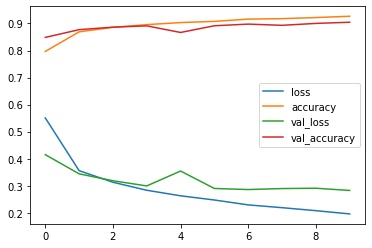

In [20]:
metrics.plot()

In [21]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2825 - accuracy: 0.9045


[0.2825164198875427, 0.9045000076293945]

In [22]:
from sklearn.metrics import classification_report

In [23]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.86      0.86      1000
           3       0.91      0.90      0.91      1000
           4       0.83      0.87      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.75      0.72      0.73      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Predictions for new clothes

In [41]:
new_clothes = X_test[1]

In [42]:
new_clothes = new_clothes.reshape(28,28)

In [43]:
new_clothes.shape

(28, 28)

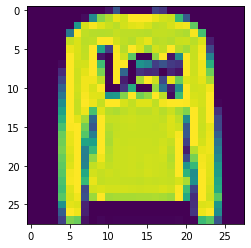

In [44]:
plt.imshow(new_clothes)

In [45]:
model.predict_classes(new_clothes.reshape(1,28,28,1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2])